<a href="https://colab.research.google.com/github/vishalvvs/Binary-Classification---Deep-Learning/blob/master/BinaryImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting Google Drive

In [2]:
from google.colab import drive

In [4]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Importing Libraries and Visualizing the data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

'2.4.1'

In [2]:
train_dir = "/content/drive/MyDrive/dataset/training_set"
test_dir = "/content/drive/MyDrive/dataset/test_set"

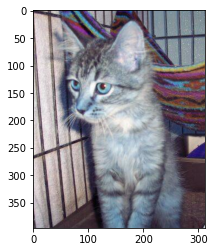

In [8]:
img = cv2.imread(train_dir + "/cats/cat.2.jpg")
plt.imshow(img)

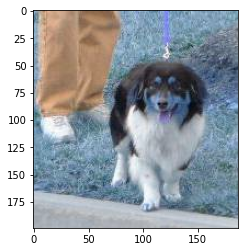

In [10]:
img = cv2.imread(train_dir + "/dogs/dog.2.jpg")
plt.imshow(img)

In [11]:
img.shape

(199, 187, 3)

## Data Augmentation

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.1,
                               horizontal_flip = True)
test_gen = ImageDataGenerator(rescale = 1./255)

In [46]:
# Make sure you provide the same target size as initialied for the image size
# Data Preparation for the Model Training 
training_set = train_gen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

test_set = test_gen.flow_from_directory(test_dir,
                                        target_size = (64,64),
                                        batch_size = 16,
                                        class_mode = "binary",
                                        )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Model Creation

In [20]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

In [47]:
img_size = [64,64,3]
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=img_size,activation="relu",padding="same"))
model.add(MaxPool2D(strides=2,pool_size=(2,2)))

# model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=img_size,activation="relu",padding="same"))
# model.add(MaxPool2D(strides=2,pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=img_size,activation="relu",padding="same"))
model.add(MaxPool2D(strides=2,pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [49]:
# Part 3 - Training the CNN

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
model.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
500/500 [==============================] - 40s 80ms/step - loss: 0.6880 - accuracy: 0.5346 - val_loss: 0.6611 - val_accuracy: 0.6115
Epoch 2/5
500/500 [==============================] - 40s 79ms/step - loss: 0.5964 - accuracy: 0.6916 - val_loss: 0.5673 - val_accuracy: 0.7120
Epoch 3/5
500/500 [==============================] - 40s 79ms/step - loss: 0.5385 - accuracy: 0.7258 - val_loss: 0.5380 - val_accuracy: 0.7250
Epoch 4/5
500/500 [==============================] - 40s 79ms/step - loss: 0.4973 - accuracy: 0.7616 - val_loss: 0.5302 - val_accuracy: 0.7425
Epoch 5/5
500/500 [==============================] - 40s 80ms/step - loss: 0.4759 - accuracy: 0.7748 - val_loss: 0.5069 - val_accuracy: 0.7630


## Saving the Model

In [53]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_rcat_dog.h5')

In [25]:
# from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

## Predictions

In [50]:
# Part 4 - Making a single prediction

import numpy as np
# from tensorflow.keras.preprocessing import image
test_image = image.load_img(test_dir + '/cats/cat.4004.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [51]:
result

array([[0.3006465]], dtype=float32)

In [52]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


#### Load an object in python from an id
*Since forgot to store in a variable, anyways learnt something new*

In [60]:
import ctypes
history = ctypes.cast(0x7ff08b113550, ctypes.py_object).value

## Visualize Training and Validation Accuracy

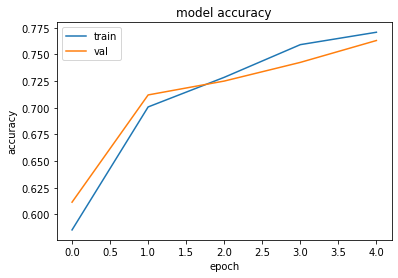

In [62]:
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

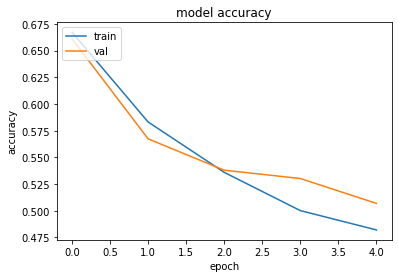

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()